# Baseline Model

In [1]:
#Import necessary libraries
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [2]:
!wget https://storage.googleapis.com/x_ray_dataset/dataset.zip

--2023-09-28 02:08:25--  https://storage.googleapis.com/x_ray_dataset/dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1223985703 (1.1G) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   1.14G  26.4MB/s    in 45s     

2023-09-28 02:09:11 (25.7 MB/s) - ‘dataset.zip’ saved [1223985703/1223985703]



In [3]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/PNEUMONIA/person491_bacteria_2071.jpeg  
  inflating: dataset/train/PNEUMONIA/person702_bacteria_2601.jpeg  
  inflating: dataset/train/PNEUMONIA/person276_bacteria_1298.jpeg  
  inflating: dataset/train/PNEUMONIA/person763_virus_1391.jpeg  
  inflating: dataset/train/PNEUMONIA/person444_virus_911.jpeg  
  inflating: dataset/train/PNEUMONIA/person629_bacteria_2507.jpeg  
  inflating: dataset/train/PNEUMONIA/person73_bacteria_357.jpeg  
  inflating: dataset/train/PNEUMONIA/person1473_virus_2553.jpeg  
  inflating: dataset/train/PNEUMONIA/person348_bacteria_1604.jpeg  
  inflating: dataset/train/PNEUMONIA/person1415_bacteria_3629.jpeg  
  inflating: dataset/train/PNEUMONIA/person775_virus_1404.jpeg  
  inflating: dataset/train/PNEUMONIA/person37_bacteria_187.jpeg  
  inflating: dataset/train/PNEUMONIA/person1208_bacteria_3160.jpeg  
  inflating: dataset/train/PNEUMONIA/person506_bacteria_2136.jpeg  
  inflating

In [4]:
root_dir = "/content/dataset"

for dirpath, dirnames, filenames in os.walk(root_dir):
    print(f"Directory: {dirpath}")
    print(f"Number of images: {len(filenames)}")
    print()


Directory: /content/dataset
Number of images: 0

Directory: /content/dataset/val
Number of images: 0

Directory: /content/dataset/val/NORMAL
Number of images: 8

Directory: /content/dataset/val/PNEUMONIA
Number of images: 8

Directory: /content/dataset/test
Number of images: 0

Directory: /content/dataset/test/NORMAL
Number of images: 234

Directory: /content/dataset/test/PNEUMONIA
Number of images: 390

Directory: /content/dataset/train
Number of images: 0

Directory: /content/dataset/train/NORMAL
Number of images: 1341

Directory: /content/dataset/train/PNEUMONIA
Number of images: 3875



In [5]:
def retrieve_labels(train_dir, test_dir, val_dir):
  """
  Retrieve the labels from the training, test, and validation directories and print them out along with the count of labels for each directory.
  """
  # Retrieve labels from training directory
  train_labels = os.listdir(train_dir)
  print(f"Training labels: {train_labels}")
  print(f"Number of training labels: {len(train_labels)}")
  print()

  # Retrieve labels from test directory
  test_labels = os.listdir(test_dir)
  print(f"Test labels: {test_labels}")
  print(f"Number of test labels: {len(test_labels)}")
  print()

  # Retrieve labels from validation directory
  val_labels = os.listdir(val_dir)
  print(f"Validation labels: {val_labels}")
  print(f"Number of validation labels: {len(val_labels)}")
  print()



In [6]:
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"
val_dir = "/content/dataset/val"
retrieve_labels(train_dir, test_dir, val_dir)

Training labels: ['NORMAL', 'PNEUMONIA']
Number of training labels: 2

Test labels: ['NORMAL', 'PNEUMONIA']
Number of test labels: 2

Validation labels: ['NORMAL', 'PNEUMONIA']
Number of validation labels: 2



In [7]:
def view_random_images(target_dir, num_images):
    """
    View num_images random images from the subdirectories of target_dir as a subplot.
    """
    # Get list of subdirectories
    subdirs = [d for d in os.listdir(target_dir) if os.path.isdir(os.path.join(target_dir, d))]

    # Create a subplot
    fig, axes = plt.subplots(1, num_images, figsize=(15,9))

    for i in range(num_images):
        # Select a random subdirectory
        subdir = random.choice(subdirs)
        # Get list of images in subdirectory
        image_paths = [f for f in os.listdir(os.path.join(target_dir, subdir))]
        # Select a random image
        image_path = random.choice(image_paths)
        # Load image
        image = plt.imread(os.path.join(target_dir, subdir, image_path))
        # Display image in subplot
        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(subdir)
        print(f"Shape of image {i+1}: {image.shape}") #width, height, colour channels

    plt.show()


Shape of image 1: (198, 500, 3)
Shape of image 2: (1296, 1416)
Shape of image 3: (2187, 2362)
Shape of image 4: (1360, 1786)


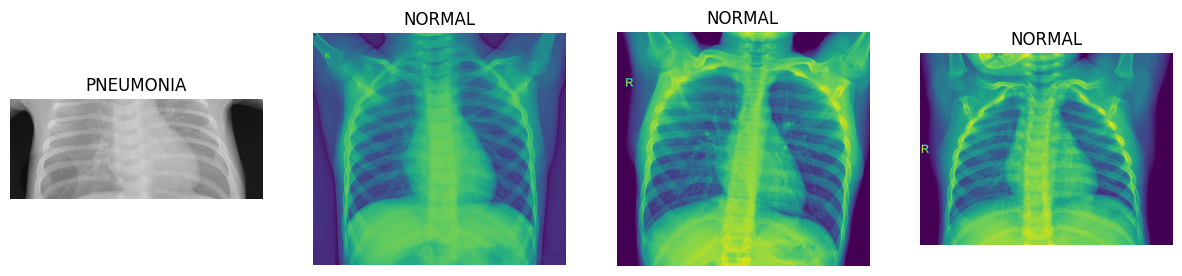

In [ ]:
view_random_images(target_dir="/content/dataset/train", num_images=4)

In [8]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/dataset/train/"
val_dir = "/content/dataset/val"
test_dir = "/content/dataset/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224), # convert all images to be 224 x 224
                                               class_mode="binary")

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               shuffle=False)
test_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                              shuffle=False)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
#Build the model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=16,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), #(height, width, colour channels)
tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1050, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


#Fit the model
# Add an early stopping callback
callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)]
history_1 = model_1.fit(train_data,
epochs=20,
validation_data=valid_data,
callbacks=[callbacks]
)



Epoch 1/20
163/163 [==============================] - 73s 369ms/step - loss: 0.3032 - accuracy: 0.8878 - val_loss: 0.1695 - val_accuracy: 1.0000
Epoch 2/20
163/163 [==============================] - 60s 366ms/step - loss: 0.1005 - accuracy: 0.9632 - val_loss: 0.7870 - val_accuracy: 0.6250
Epoch 3/20
163/163 [==============================] - 58s 354ms/step - loss: 0.0758 - accuracy: 0.9722 - val_loss: 0.3707 - val_accuracy: 0.8125
Epoch 4/20
163/163 [==============================] - 58s 353ms/step - loss: 0.0696 - accuracy: 0.9762 - val_loss: 1.2478 - val_accuracy: 0.6250


In [ ]:
model_1.evaluate(test_data)

20/20 [==============================] - 6s 291ms/step - loss: 0.7441 - accuracy: 0.7644


[0.7441319227218628, 0.7644230723381042]

In [ ]:
def plot_loss_accuracy(history_1):
  # Extract the loss and accuracy history for both training and validation data
  loss = history_1.history['loss']
  val_loss = history_1.history['val_loss']
  acc = history_1.history['accuracy']
  val_acc = history_1.history['val_accuracy']

  # Create subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))

  # Plot the loss history
  ax1.plot(loss, label='Training loss')
  ax1.plot(val_loss, label='Validation loss')
  ax1.set_title('Loss history')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()

  # Plot the accuracy history
  ax2.plot(acc, label='Training accuracy')
  ax2.plot(val_acc, label='Validation accuracy')
  ax2.set_title('Accuracy history')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()

  plt.show()


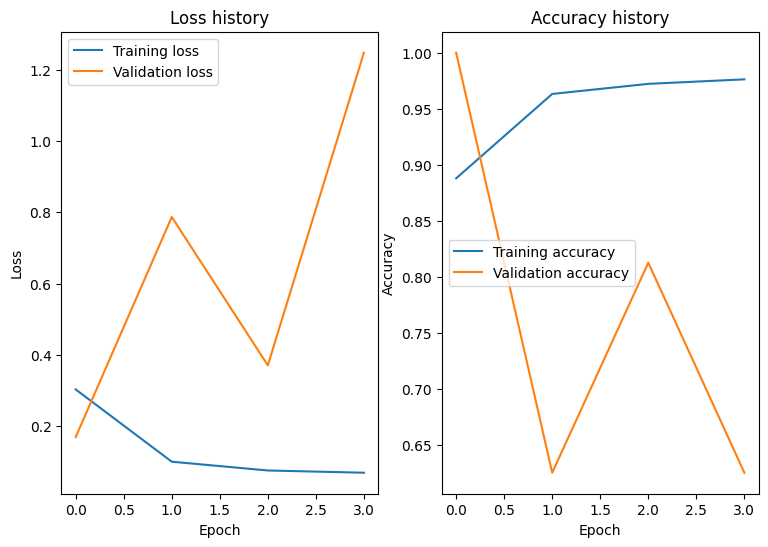

In [ ]:
# Lets plot the training and validation loss and accuruacy
plot_loss_accuracy(history_1)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

#Model simplification


In [ ]:
def error_analysis(model, data):
    labels_idx = data.labels
    idx_class = {j:i for i,j in data.class_indices.items()}
    pred = model.predict(data)
    pred_idx = pred.argmax(axis=1)
    compare = labels_idx == pred_idx
    incorrect_idx = np.where(compare==False)
    g_idx = labels_idx[incorrect_idx]
    p_idx = pred_idx[incorrect_idx]
    img_paths = np.array(data.filepaths)[incorrect_idx]

    # Choose 9 random misclassified images
    random_idx = random.sample(range(len(img_paths)), 9)

    fig, ax = plt.subplots(3, 3, figsize=(10, 10))
    for i, idx in enumerate(random_idx):
        img = Image.open(img_paths[idx])
        img_n = img.resize((224,224))
        img_np = np.expand_dims(np.array(img_n)*(1./255), 0)

        ax[i//3, i%3].axis("off")
        ax[i//3, i%3].imshow(img_np.squeeze())
        #ax[i//3, i%3].set_title("Predicted label: " + idx_class[p_idx[idx]], size=15, color='red')
        ax[i//3, i%3].text(5, -35, "True: " + idx_class[g_idx[idx]], size=12, color='black', ha="center", va="top")
        ax[i//3, i%3].text(180, -35, "Predicted: " + idx_class[p_idx[idx]], size=12, color='red', ha="center", va="top")
    plt.tight_layout()
plt.show()


20/20 [==============================] - 6s 282ms/step


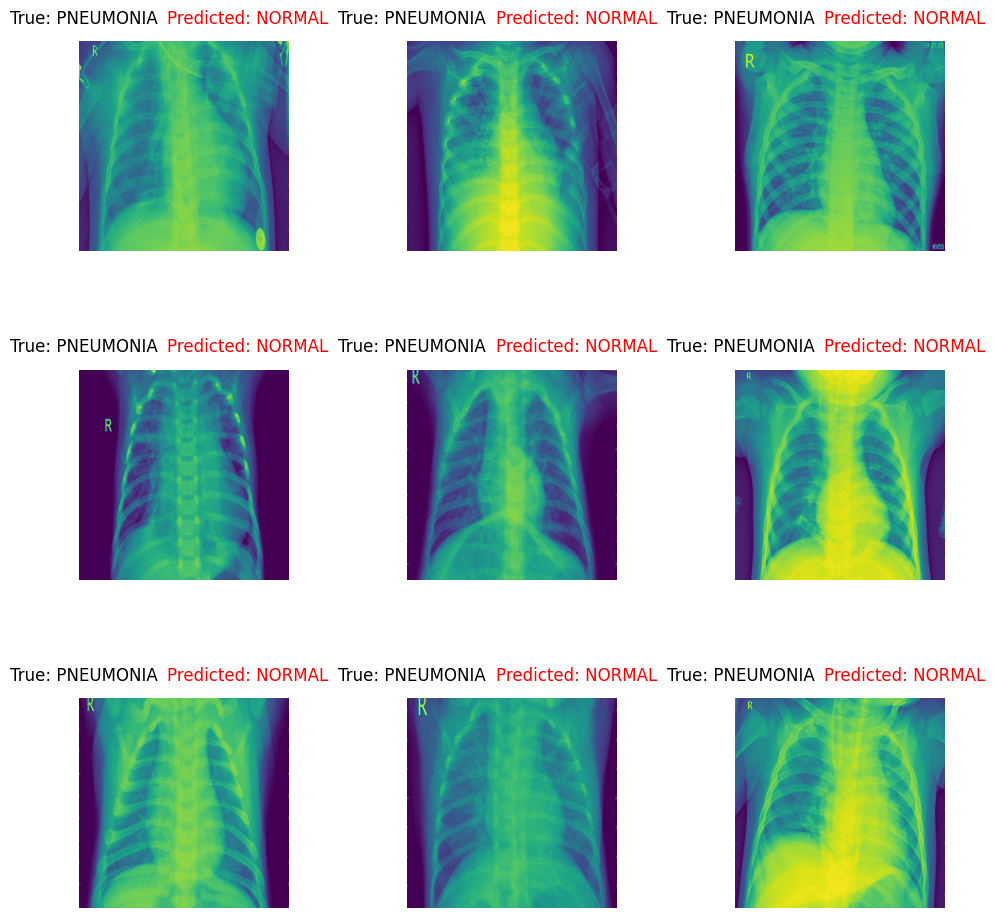

In [ ]:
# Change the data to try on different data
error_analysis(model=model_1, data=test_data)

In [ ]:
# Set up the model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=16,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), #(height, width, colour channels)
tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(300, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile and fit the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Add an early stopping callback
callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)]
history_2 = model_2.fit(train_data,
epochs=50,
validation_data=valid_data,
callbacks=[callbacks]
)



Epoch 1/50
163/163 [==============================] - 60s 352ms/step - loss: 0.2710 - accuracy: 0.9049 - val_loss: 0.2592 - val_accuracy: 0.8750
Epoch 2/50
163/163 [==============================] - 59s 361ms/step - loss: 0.1006 - accuracy: 0.9638 - val_loss: 0.4055 - val_accuracy: 0.8125
Epoch 3/50
163/163 [==============================] - 58s 355ms/step - loss: 0.0752 - accuracy: 0.9732 - val_loss: 0.4417 - val_accuracy: 0.8125
Epoch 4/50
163/163 [==============================] - 58s 352ms/step - loss: 0.0518 - accuracy: 0.9831 - val_loss: 0.2623 - val_accuracy: 0.8750


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
model_2.evaluate(test_data)

20/20 [==============================] - 6s 287ms/step - loss: 0.8344 - accuracy: 0.7676


[0.8344243168830872, 0.7676281929016113]

#Data Augmentatation

In [ ]:
ImageDataGenerator(rescale=1./255,rotation_range=25,
 width_shift_range=0.3,
 height_shift_range=0.3,
 horizontal_flip=True, )
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/dataset/train/"
val_dir = "/content/dataset/val"
test_dir = "/content/dataset/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224), # convert all images to be 224 x 224
                                               class_mode="binary")

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               shuffle=False)
test_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                              shuffle=False)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Get a batch of data
X, y = train_data.next()




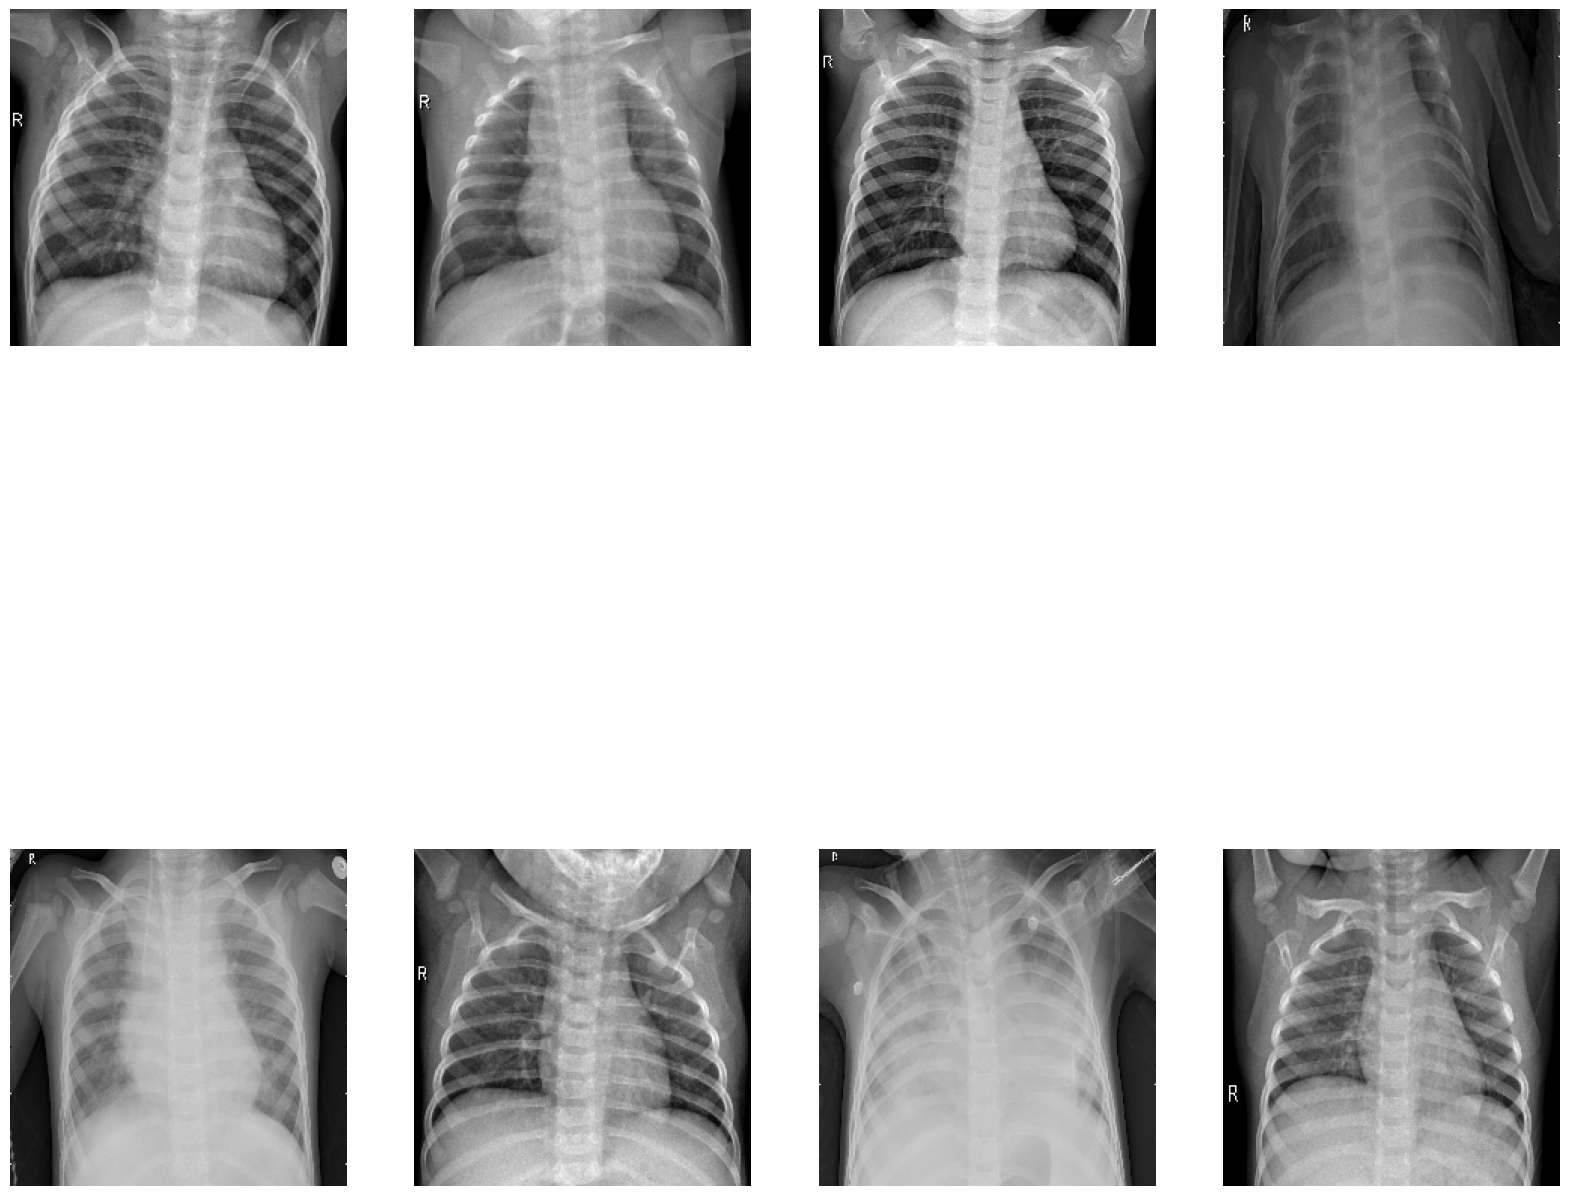

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20,20))
for i in range(len(X[:8])):
  ax = axs[i//4][i%4]
  ax.imshow(X[i])
  ax.axis("off")

plt.show()

In [ ]:
model_3 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=16,
                           kernel_size=3, # can also be (3, 3)
                           activation="relu",
                           input_shape=(224, 224, 3)), #(height, width, colour channels)
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(32, 3, activation="relu"),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64, 3, activation="relu"),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1050, activation="relu"),
      #tf.keras.layers.Dropout(0.6), # added dropout layer
      tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
    ])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

    # Fit the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
history_3 = model_3.fit(train_data,
                        epochs=20,
                        validation_data=valid_data, callbacks=[early_stopping])



Epoch 1/20
163/163 [==============================] - 60s 358ms/step - loss: 0.3137 - accuracy: 0.8930 - val_loss: 0.2032 - val_accuracy: 0.9375
Epoch 2/20
163/163 [==============================] - 57s 352ms/step - loss: 0.1009 - accuracy: 0.9632 - val_loss: 0.3493 - val_accuracy: 0.8750
Epoch 3/20
163/163 [==============================] - 58s 357ms/step - loss: 0.0737 - accuracy: 0.9737 - val_loss: 0.1736 - val_accuracy: 0.8750
Epoch 4/20
163/163 [==============================] - 59s 359ms/step - loss: 0.0643 - accuracy: 0.9747 - val_loss: 0.1436 - val_accuracy: 0.9375


In [ ]:
model_3.evaluate(test_data)

20/20 [==============================] - 5s 244ms/step - loss: 0.6703 - accuracy: 0.7772


[0.6702913641929626, 0.7772436141967773]

## Plot random images from test data

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
def plot_pred_images(model, data):
    labels = data.labels
    img_paths = data.filepaths
    predictions = list()
    idx_class = {j:i for i,j in data.class_indices.items()}

    # Random ten numbers
    ten_random = random.sample(range(1,len(labels)),10)
    process_rand = [(val//32, val%32) for val in ten_random]

    # Truncating data, labels and images path with respect to random number
    data_trunc = [data[i][0][j] for i,j in process_rand]
    labels_trunc = [labels[i] for i in ten_random]
    paths_trunc = [img_paths[i] for i in ten_random]

    # Prediction
    pred = model.predict(np.array(data_trunc))
    comparision = labels_trunc == pred.argmax(axis=1)

    colors = ["red" if i==False else "green" for i in comparision]
    pred_labels = [idx_class[i] for i in pred.argmax(axis=1)]
    #print(colors)
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    for i, (img_pth, comp) in enumerate(zip(img_paths, comparision)):
        img = plt.imread(img_pth)
        if i < 5:
            axes[0][i%5].imshow(img)
            axes[0][i%5].set_title(pred_labels[i], color=colors[i])
        else:
            axes[1][i%5].imshow(img)
            axes[1][i%5].set_title(pred_labels[i], color=colors[i])
    # print(labels_trunc)
    # print(pred.argmax(axis=1))

1/1 [==============================] - 0s 255ms/step


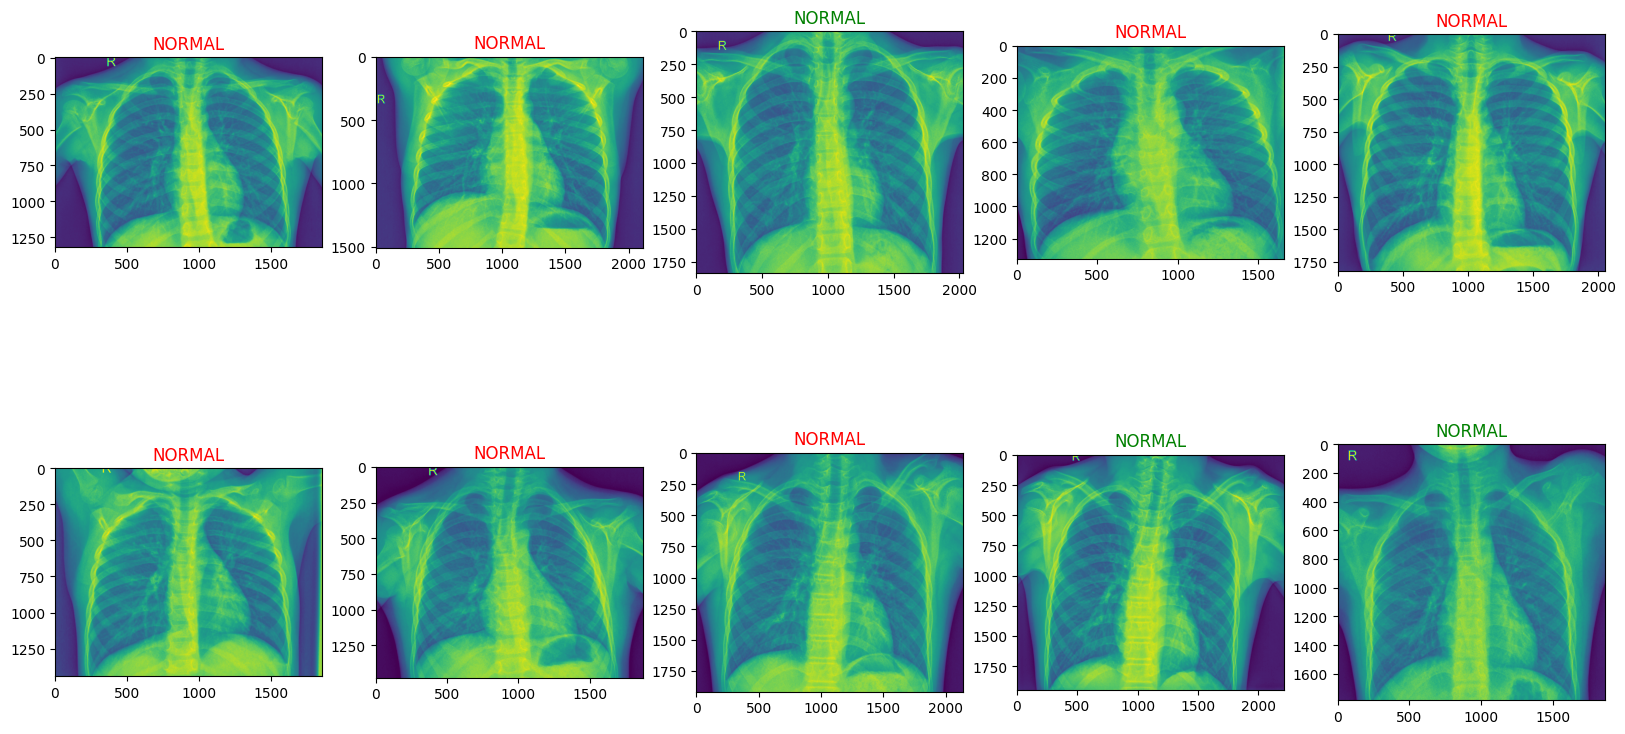

In [ ]:
plot_pred_images(model_1, test_data)

In [ ]:
def display_random_images(model, test_data):
  # Get test data labels and image paths
  test_labels = test_data.labels
  test_img_paths = test_data.filepaths

  # Convert class indices to class labels
  idx_to_class = {j:i for i,j in test_data.class_indices.items()}

  # Generate 10 random indices
  random_indices = random.sample(range(1, len(test_labels)), 10)

  # Get data and labels for the random indices
  random_data = [test_data[i][0] for i in random_indices]
  random_labels = [test_labels[i] for i in random_indices]
  random_img_paths = [test_img_paths[i] for i in random_indices]

  # Predict labels for the random data
  predictions = model.predict(np.array(random_data))
  predicted_labels = [idx_to_class[i] for i in predictions.argmax(axis=1)]

  # Compare predicted and true labels
  comparision = random_labels == predictions.argmax(axis=1)

  # Set colors for the labels based on whether they match
  colors = ["red" if i==False else "green" for i in comparision]

  # Create subplots
  fig, axes = plt.subplots(2, 5, figsize=(20, 10))
  for i, (img_path, pred, true, color) in enumerate(zip(random_img_paths, predicted_labels, random_labels, colors)):
      img = plt.imread(img_path)
      if i < 5:
          axes[0][i%5].imshow(img)
          axes[0][i%5].set_title(f"Pred: {pred}\nTrue: {true}", color=color)
      else:
          axes[1][i%5].imshow(img)
          axes[1][i%5].set_title(f"Pred: {pred}\nFalse: {false}", color=color)


# Transfer learning

In [ ]:
from tensorflow.keras.applications import InceptionV3, MobileNet, VGG16, ResNet50

In [ ]:
# VGG16
vgg16 = VGG16(weights='imagenet')
print("Number of layers in VGG16:", len(vgg16.layers))

# ResNet50
resnet = ResNet50(weights='imagenet')
print("Number of layers in ResNet50:", len(resnet.layers))

# InceptionV3
inception = InceptionV3(weights='imagenet')
print("Number of layers in InceptionV3:", len(inception.layers))

# MobileNet
mobilenet = MobileNet(weights='imagenet')
print("Number of layers in MobileNet:", len(mobilenet.layers))





553467096/553467096 [==============================] - 8s 0us/step
Number of layers in VGG16: 23
102967424/102967424 [==============================] - 1s 0us/step
Number of layers in ResNet50: 177
96112376/96112376 [==============================] - 1s 0us/step
Number of layers in InceptionV3: 313
17225924/17225924 [==============================] - 0s 0us/step
Number of layers in MobileNet: 91


In [ ]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/dataset/train/"
val_dir = "/content/dataset/val"
test_dir = "/content/dataset/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224), # convert all images to be 224 x 224
                                               class_mode="binary")

valid_data = valid_datagen.flow_from_directory(val_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               shuffle=False)
test_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                              shuffle=False)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Instantiate the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model on top of VGG16
model_4 = tf.keras.models.Sequential()
model_4.add(vgg16)
model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(1024, activation='relu'))
model_4.add(tf.keras.layers.Dropout(0.5))
model_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
history_4 = model_4.fit(train_data,
epochs=20,
validation_data=valid_data,
callbacks=[callbacks]
)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
163/163 [==============================] - 70s 392ms/step - loss: 0.4204 - accuracy: 0.9262 - val_loss: 0.4115 - val_accuracy: 0.8125
Epoch 2/20
163/163 [==============================] - 61s 376ms/step - loss: 0.0850 - accuracy: 0.9693 - val_loss: 0.5863 - val_accuracy: 0.7500
Epoch 3/20
163/163 [==============================] - 62s 379ms/step - loss: 0.0535 - accuracy: 0.9803 - val_loss: 0.1320 - val_accuracy: 0.9375
Epoch 4/20
163/163 [==============================] - 62s 378ms/step - loss: 0.0535 - accuracy: 0.9801 - val_loss: 0.1033 - val_accuracy: 0.9375
Epoch 5/20
163/163 [==============================] - 62s 377ms/step - loss: 0.0531 - accuracy: 0.9799 - val_loss: 0.1875 - val_accuracy: 0.8750
Epoch 6/20
163/163 [==============================] - 64s 389ms/step - loss: 0.0422 - accuracy: 0.9833 - val_loss: 0.0942 - val_accuracy: 0.9375


In [ ]:
model_4.evaluate(test_data)

20/20 [==============================] - 7s 309ms/step - loss: 0.5253 - accuracy: 0.8462


[0.5253050923347473, 0.8461538553237915]

In [ ]:
#Import ResNet50 model
from tensorflow.keras.applications import ResNet50

#Instantiate the ResNet50 model
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Freeze all layers in the ResNet50 model
for layer in resnet50.layers:
  layer.trainable = False

#Create a new model on top of ResNet50
model_5 = tf.keras.models.Sequential()
model_5 .add(resnet50)
model_5 .add(tf.keras.layers.Flatten())
model_5 .add(tf.keras.layers.Dense(1024, activation='relu'))
model_5 .add(tf.keras.layers.Dropout(0.5))
model_5 .add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile the model
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
history_5 = model_5.fit(train_data,
epochs=20,
validation_data=valid_data,
callbacks=[callbacks]
)

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/20
163/163 [==============================] - 69s 392ms/step - loss: 1.2095 - accuracy: 0.7527 - val_loss: 1.0347 - val_accuracy: 0.5625
Epoch 2/20
163/163 [==============================] - 63s 385ms/step - loss: 0.4014 - accuracy: 0.8098 - val_loss: 1.0683 - val_accuracy: 0.5625
Epoch 3/20
163/163 [==============================] - 62s 380ms/step - loss: 0.4033 - accuracy: 0.7928 - val_loss: 1.0476 - val_accuracy: 0.5625
Epoch 4/20
163/163 [==============================] - 62s 379ms/step - loss: 0.4154 - accuracy: 0.8069 - val_loss: 1.0092 - val_accuracy: 0.6250
Epoch 5/20
163/163 [==============================] - 62s 379ms/step - loss: 0.4165 - accuracy: 0.7477 - val_loss: 0.7862 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 62s 377ms/step - loss: 0.4100 - accuracy: 0.7429 - val_loss: 0.8251 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 62s 380ms/s

In [ ]:
!pip install efficientnet

# Import the EfficientNetB0 model
from efficientnet.tfkeras import EfficientNetB0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Instantiate the EfficientNetB0 model
efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the EfficientNetB0 model
for layer in efficientnet.layers:
    layer.trainable = False

# Create a new model on top of EfficientNetB0
model_6 = tf.keras.models.Sequential()
model_6.add(efficientnet)
model_6.add(tf.keras.layers.Flatten())
model_6.add(tf.keras.layers.Dense(1024, activation='relu'))
model_6.add(tf.keras.layers.Dropout(0.5))
model_6.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
history_6 = model_6.fit(train_data,
epochs=20,
validation_data=valid_data,
callbacks=[callbacks]
)


16804768/16804768 [==============================] - 0s 0us/step
Epoch 1/20
163/163 [==============================] - 81s 416ms/step - loss: 1.3013 - accuracy: 0.9302 - val_loss: 0.0936 - val_accuracy: 1.0000
Epoch 2/20
163/163 [==============================] - 60s 370ms/step - loss: 0.0866 - accuracy: 0.9703 - val_loss: 0.0960 - val_accuracy: 0.9375
Epoch 3/20
163/163 [==============================] - 60s 366ms/step - loss: 0.0851 - accuracy: 0.9711 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 4/20
163/163 [==============================] - 61s 371ms/step - loss: 0.0654 - accuracy: 0.9751 - val_loss: 0.0615 - val_accuracy: 0.9375


In [ ]:
# Load the EfficientNetB7 model
from tensorflow.keras.applications import EfficientNetB7

efficientnet_b7 = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze all the layers
for layer in efficientnet_b7.layers:
    layer.trainable = False

# Create a new model on top of EfficientNetB7
model_7 = tf.keras.models.Sequential()
model_7.add(efficientnet_b7)
model_7.add(tf.keras.layers.Flatten())
model_7.add(tf.keras.layers.Dense(1024, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model_7.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model_7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
history_7 = model_7.fit(train_data, epochs=20, validation_data=valid_data, callbacks=[callbacks])


258076736/258076736 [==============================] - 2s 0us/step
Epoch 1/20
163/163 [==============================] - 109s 517ms/step - loss: 1.1420 - accuracy: 0.7007 - val_loss: 0.7708 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 75s 460ms/step - loss: 0.6364 - accuracy: 0.6927 - val_loss: 0.8022 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 75s 460ms/step - loss: 0.6110 - accuracy: 0.7272 - val_loss: 0.9599 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 75s 460ms/step - loss: 0.5992 - accuracy: 0.7257 - val_loss: 0.7847 - val_accuracy: 0.5000


#Fine Tuning


In [ ]:
# Load the InceptionV3 model
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the last 50 layers of the InceptionV3 model
for layer in inception.layers[-50:]:
    layer.trainable = True

# Create a new model on top of InceptionV3
model_8 = tf.keras.models.Sequential()
model_8.add(inception)
model_8.add(tf.keras.layers.Flatten())
model_8.add(tf.keras.layers.Dense(1024, activation='relu'))
model_8.add(tf.keras.layers.Dropout(0.5))
model_8.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with a smaller learning rate
model_8.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
history_8 = model_8.fit(train_data,
                        epochs=10,
                        validation_data=valid_data,
                        callbacks=[callbacks])


87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/10
163/163 [==============================] - 113s 430ms/step - loss: 0.2304 - accuracy: 0.9043 - val_loss: 2.7082 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 67s 412ms/step - loss: 0.0647 - accuracy: 0.9770 - val_loss: 3.6397 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 67s 409ms/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 3.8445 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 67s 413ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 1.5938 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 68s 414ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.3882 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 67s 411ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.4404 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 69s 421ms/

In [ ]:
# Load the InceptionV3 model
from tensorflow.keras.applications import InceptionV3

# Instantiate the InceptionV3 model
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the InceptionV3 model
for layer in inception.layers:
    layer.trainable = False

# Create a new model on top of InceptionV3
model_9 = tf.keras.models.Sequential()
model_9.add(inception)
model_9.add(tf.keras.layers.Flatten())
model_9.add(tf.keras.layers.Dense(1024, activation='relu'))
model_9.add(tf.keras.layers.Dropout(0.5))
model_9.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model_9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
history_9 = model_9.fit(train_data,
                        epochs=20,
                        validation_data=valid_data,
                        callbacks=[callbacks])




Epoch 1/20
163/163 [==============================] - 67s 380ms/step - loss: 3.8511 - accuracy: 0.8993 - val_loss: 0.3869 - val_accuracy: 0.9375
Epoch 2/20
163/163 [==============================] - 60s 370ms/step - loss: 0.1102 - accuracy: 0.9594 - val_loss: 0.4118 - val_accuracy: 0.8125
Epoch 3/20
163/163 [==============================] - 60s 368ms/step - loss: 0.1215 - accuracy: 0.9542 - val_loss: 0.8023 - val_accuracy: 0.6250
Epoch 4/20
163/163 [==============================] - 60s 369ms/step - loss: 0.0925 - accuracy: 0.9624 - val_loss: 0.6941 - val_accuracy: 0.6875


In [ ]:
# Load the MobileNet model
from tensorflow.keras.applications import MobileNet

# Instantiate the MobileNet model
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the MobileNet model
for layer in mobilenet.layers:
    layer.trainable = False

# Create a new model on top of MobileNet
model_10 = tf.keras.models.Sequential()
model_10.add(mobilenet)
model_10.add(tf.keras.layers.Flatten())
model_10.add(tf.keras.layers.Dense(1024, activation='relu'))
model_10.add(tf.keras.layers.Dropout(0.5))
model_10.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model_10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)]
history_10 = model_10.fit(train_data,
                          epochs=20,
                          validation_data=valid_data,
                          callbacks=[callbacks])

17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/20
163/163 [==============================] - 60s 353ms/step - loss: 3.5519 - accuracy: 0.9321 - val_loss: 0.1388 - val_accuracy: 0.9375
Epoch 2/20
163/163 [==============================] - 58s 356ms/step - loss: 0.0620 - accuracy: 0.9776 - val_loss: 0.1263 - val_accuracy: 0.9375
Epoch 3/20
163/163 [==============================] - 58s 354ms/step - loss: 0.0507 - accuracy: 0.9822 - val_loss: 0.2672 - val_accuracy: 0.8750
Epoch 4/20
163/163 [==============================] - 56s 343ms/step - loss: 0.0400 - accuracy: 0.9868 - val_loss: 0.1369 - val_accuracy: 0.9375


In [ ]:
def evaluate_models(models, model_names,test_data):
    # Initialize lists for the results
    losses = []
    accuracies = []

    # Iterate over the models
    for model in models:
        # Evaluate the model
        loss, accuracy = model.evaluate(test_data)
        losses.append(loss)
        accuracies.append(accuracy)
       # Convert the results to percentages
    losses = [round(loss * 100, 2) for loss in losses]
    accuracies = [round(accuracy * 100, 2) for accuracy in accuracies]

    # Create a dataframe with the results
    results = pd.DataFrame({"Model": model_names,
                            "Loss": losses,
                            "Accuracy": accuracies})

    return results


In [ ]:
# Define the models and model names
models = [model_1, model_2,  model_3, model_4, model_5,  model_6, model_7, model_8, model_9, model_10]
model_names = ["model 1", "model 2", "model 3", "model 4", "model 5", "model 6", "model 7", "model 8", "model 9", "model 10" ]

# Evaluate the models
results = evaluate_models(models, model_names,test_data)

# Display the results
results
results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)


20/20 [==============================] - 5s 246ms/step - loss: 1.1799 - accuracy: 0.8590


,Model,Loss,Accuracy
0,model 10,117.99,85.90
1,model 4,52.53,84.62
2,model 6,126.31,80.77
3,model 8,146.59,78.69
4,model 9,91.55,78.37
5,model 3,67.03,77.72
6,model 2,83.44,76.76
7,model 1,74.41,76.44
8,model 5,52.34,75.32
9,model 7,66.94,62.50
